# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

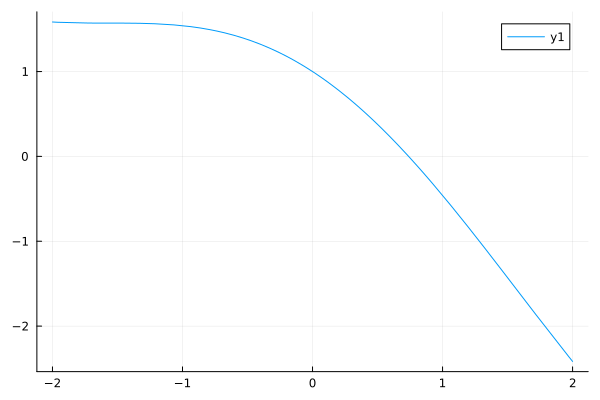

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

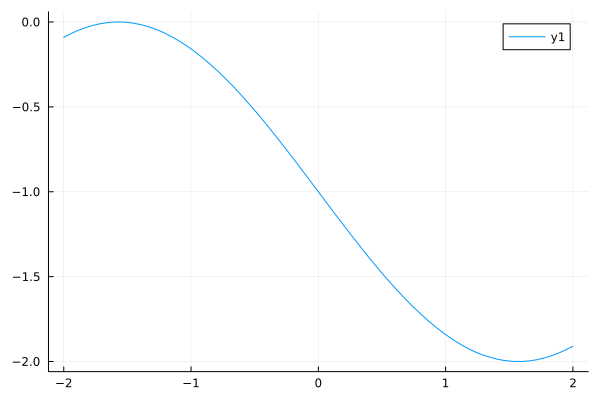

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 0.68507389982090516, 0.9999969722835389 )
(a₅, b₅) = ( 0.73908449070788018, 0.739085775539707 )
(a₆, b₆) = ( 0.73908513321516056, 0.73908513321516078 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

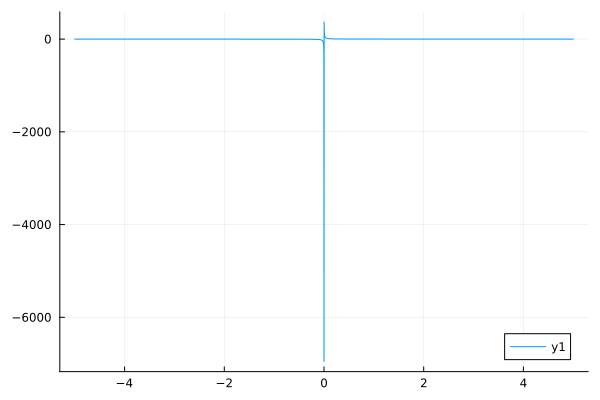

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

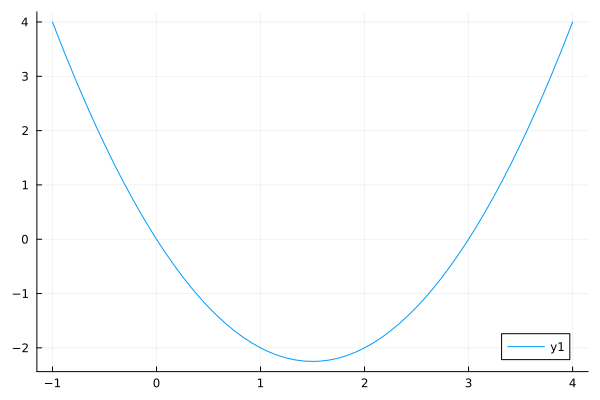

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.2.5/

### 4. Wyciąganie informacji z przebiegu działania funkcji: 

https://docs.juliahub.com/Roots/o0Xsi/2.2.5/reference/#Roots.Tracks 

In [26]:
tracker = Roots.Tracks()

Algorithm has not been run

In [27]:
find_zero(f, (0, 2), Roots.Secant(), tracks=tracker)

0.7390851332151607

In [28]:
tracker

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 2,	 fx₂ = -2.4161468365471426
x₃ = 0.58545492793321863,	 fx₃ = 0.24800586076647069
x₄ = 0.7171348682551959,	 fx₄ = 0.036556996479681581
x₅ = 0.73990076549012351,	 fx₅ = -0.0013652977662494958
x₆ = 0.73908113605420545,	 fx₆ = 6.6896907529034877e-06
x₇ = 0.73908513249559438,	 fx₇ = 1.2042747910001594e-09
x₈ = 0.73908513321516134,	 fx₈ = -1.1102230246251565e-15
x₉ = 0.73908513321516067,	 fx₉ = 0



In [29]:
tracker.steps

7

In [30]:
 tracker.fncalls

9

<b>WAŻNE: empty!(tracker) po każdym wywołaniu funkcji, inaczej zostają tam wyniki z poprzednich wywołań zakłamujące dane.</b>

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)